# Time Series Analysis

> Practical Time Series Analysis  - Forecasting Individual Household Electric Power Consumption. We'll explore and build time series forecasting models for measurements of electric power consumption in one household with a one-minute sampling rate over a period of almost 4 years.

- author: Victor Omondi
- toc: true
- comments: true
- image:

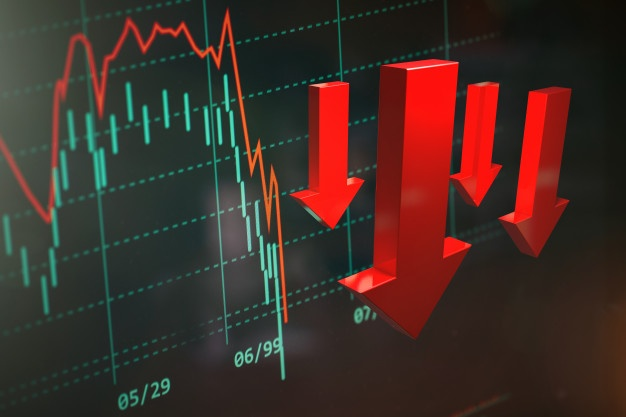

# Libraries

In [1]:
%matplotlib inline

In [33]:
# WARNINGS
import warnings

# EXPLORATION AND MANIPULATION
import pandas as pd
import numpy as np

# VISUALIZATION
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

import statsmodels.api as sm
from statsmodels.tsa.stattools import (adfuller, 
                                       acf, 
                                       pacf
)
from statsmodels.graphics.tsaplots import (plot_acf, 
                                           plot_pacf
)
from statsmodels.tsa.arima_model import ARIMA

from fbprophet import Prophet

## Libraries Configuration

In [3]:
# Pandas settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# Matplotlib settings
plt.style.use('fivethirtyeight')

# Warnings
warnings.filterwarnings('ignore', message="No frequency information was provided, so inferred frequency MS will be used.")

# Basics of Time Series

We will explore time series, how it allows for the analysis of important patterns that occur, such as trends and seasonality and how it can be used to forecast future values like GDP, unemployment rates, population, mortality rate, global temperatures, pollution levels etc.

##  Introduction

Climate change is a major environmental policy challenge. Understanding the shape of damage functions is critical to improving integrated assessment models (IAMs) used to estimate the social cost of carbon. Such estimates underpin policies to reduce greenhouse gas emissions, and foster adaptive behaviors. Among the categories of damages, incremental cooling consumption in the power sector is often recognized as a top component. Given the rise of smart electricity meters, and the wide adoption of electricity generation technology like solar panels, there is a wealth of electricity usage data available. This data represents a multivariate time series of power-related variables which could in turn be used to model, and even forecast future electricity consumption.

Machine learning algorithms predict a single value, and cannot be used directly for multi-step forecasting. Two strategies that can be used to make multi-step forecasts with machine learning algorithms are, the recursive and the direct methods. We’ll explore and build time series forecasting models, for measurements of electric power consumption in one household, with a one-minute sampling rate, over a period of almost 4 years.

## Component of a Time Series

Time series is a collection of well-defined data points obtained sequentially over a set time period, usually taken at equal time intervals. Time series allows for the analysis of important patterns that occur, such as trends and seasonality. Depending on the domain of application, time series analysis can be used to forecast future values like GDP, unemployment rates, population, mortality rate, global temperatures, pollution levels etc. Trend (T), Seasonality(S), Cyclic variations (C) and Random or Irregular movements (I) are all components of a time series.

- **Trend:**  this a long term movement observed in time series that changes over time, which can either be positive (increasing) or negative (decreasing). 
- **Seasonality:**  it is a periodic fluctuation that occurs in time series where predictable and regular patterns are exhibited at intervals; usually during a 12 month period. These fluctuations can be hourly, daily, weekly, monthly, or quarterly; they may be caused by seasons, habits, weather, traditions etc.
- **Cyclic variations** : these are oscillations occurring around a given trend in time series. The duration of a cycle varies based on the domain and business being analysed. The length of a cycle is described as the period.
- **Irregular movements:**  This is the residual after trend and seasonality have been removed from a time series. These are irregular variations that are unforeseen; cannot be predicted; and unlikely to be repeated.

## Time Series and Stochastic Process

A stochastic process is a statistical occurrence that consists of a collection of random variables ordered in time. Stochastic processes are often used in modelling time series data and considered to generate an infinite collection of all possible time series that may have been observed. One realization of a stochastic process is  considered an observed time series while an ensemble of a stochastic process is a statistical population.

## Concept of Stationary and Seasonality

A stationary time series is one where the statistical properties, such as mean and variance, do not change over time. This means that a stationary time series does not have any periodic fluctuations or trend. Many methods and tools for time series analysis have an underlying assumption that the time series is stationary. Hence, it is common to transform a non-stationary time series to stationary, by differencing to remove trend and seasonality.

### Stationary time series

![image.png](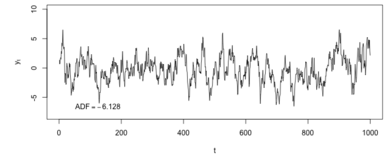 "Stationary time series")

### Non-stationary time series

![image.png](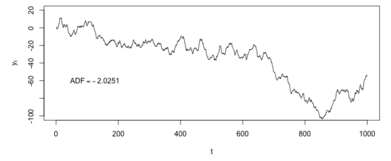 "Non-stationary time series")

## Model Parsimony

The principle of parsimony which is attributed to an English philosopher, William of Occam, suggests that given a set of equally good explanations for a phenomenon, the correct answer is the simplest explanation. Similarly in statistical modelling, a parsimonious model is one that has a great explanatory predictive power, and explains data with the minimum number of predictor variables or parameters. These models have just the right amount of predictors required to explain the model. As such, linear models are more preferable than non-linear models; experiments that depend on few assumptions should also be preferred to those that depend on many.

# Wrangling Time Series Data

We will explore how to wrangle time series data.

All codes used in this lesson can be found [here](https://gist.github.com/HamoyeHQ/ef5a4fcee731144fb091812228938c97).

As expected in any data analysis task, proper cleaning and preprocessing of the data is required.

## Handling Missing Time Series Data, Upsampling and Downsampling

Missing data is a common occurrence that happens during data collection, due to faulty entries or outright omission. Time series data is no exception to this problem. Imputation, interpolation and deletion of missing data points are methods used to handle missing data in time series.

**Imputation:**  Missing values are filled based on the overall observation of the entire data. They can be imputed using forward fill, where the last known data point before the missing value is used, and the opposite with backward fill where the next known value is used. The fillna() function in pandas is used to impute time series data for both forward and backward fill strategies. It is worth noting that backward fill is not an appropriate imputation method, when the data will be used in a predictive model. Another method of imputing missing values is by using a rolling mean or median, known as the moving average. Unlike the forward fill, data from multiple recent times in the past are used in moving average to fill missing values. This is a better option, particularly when the data is noisy, to avoid inputting random noise.

**Interpolation:**  This is another form of imputation where data points used to fill missing values are estimated, such that they fit the constraints that arise from neighbouring data points. For example, if the overall behaviour of the time series is quadratic, this trend can be incorporated when filling the missing values, such that they have a similar trend. The interpolate() function is provided in pandas to interpolate missing values.

When handling missing data, any method selected can be as a result of the domain and aim of the task.

In [4]:
passengers = pd.read_csv('datasets/airline-passengers.csv')
passengers.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
passengers.tail()

,Month,Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [6]:
passengers.shape

(144, 2)

In [7]:
passengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [8]:
passengers.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


### convert column to datetime

In [9]:
passengers['Month'] = pd.to_datetime(passengers.Month)
passengers.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [10]:
passengers.head()

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [11]:
passengers.set_index('Month', inplace=True)
passengers.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


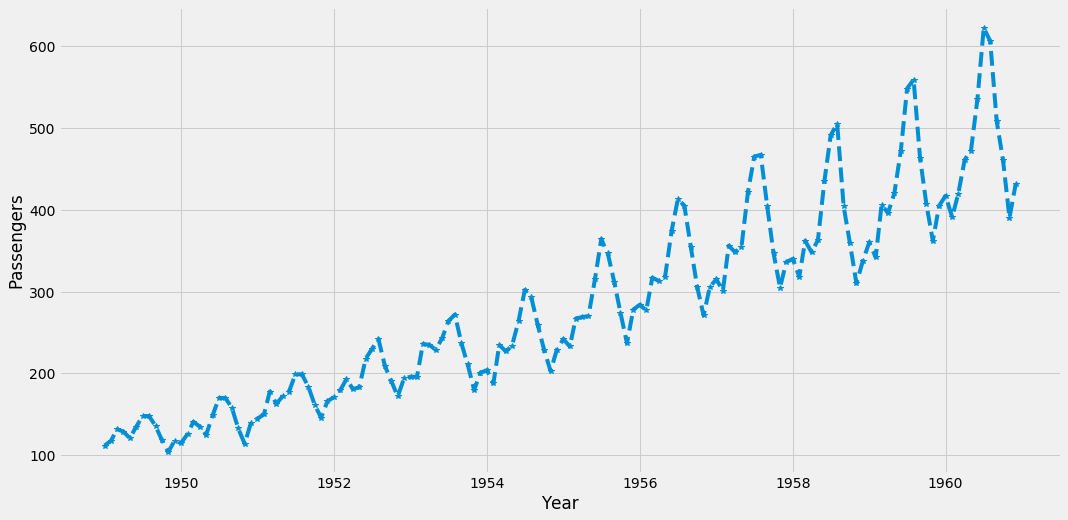

In [12]:
plt.figure(figsize=(16, 8))
plt.plot(passengers.index, passengers.Passengers, '--', marker='*')
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.show()

### handling missing data

#### check for missing values

In [13]:
passengers.isnull().sum()

Passengers    0
dtype: int64

There are no missing values in our dataset however, in bid to explain how we handle missing values, we will make a copy of our dataset and delete some values at random.

In [14]:
passengers_cp = passengers.copy()
rows = passengers_cp.sample(frac=.1, random_state=0)
rows['Passengers'] = np.nan
passengers_cp.loc[rows.index, 'Passengers'] = rows.Passengers
passengers_cp.isnull().sum()

Passengers    14
dtype: int64

There are now 14 missing values in the dataset

#### Filling missing data by imputation - Forward fill

In [15]:
passengers_cp_ffill = passengers_cp.fillna(method='ffill')
passengers_cp_ffill.isnull().sum()

Passengers    0
dtype: int64

#### Filling missing data by imputation - Backward fill

In [16]:
passengers_cp_bfill = passengers_cp.fillna(method='bfill')
passengers_cp_bfill.isnull().sum()

Passengers    0
dtype: int64

#### Filling missing data by interpolation

In [17]:
passengers_cp_LIF = passengers_cp.interpolate(method='linear', limit_direction='forward')
passengers_cp_LIF.isnull().sum()

Passengers    0
dtype: int64

In [18]:
passengers_cp_LIB = passengers_cp.interpolate(method='linear', limit_direction='backward')
passengers_cp_LIB.isnull().sum()

Passengers    0
dtype: int64

**Resampling**  is a method of changing the time period of time series observations such that it can be summarised or aggregated. The frequency can either be increased by upsampling or reduced by downsampling.

**Downsampling:**  This reduces the number of samples in the data such that multiple data points are aggregated together. For example, if the temperature in a region is reported every minute and data for the past hour is required, 3600 data points will be obtained. If data for an entire week is needed, 604800 data points will be returned. This becomes quite messy when graphed but can be easily reduced by downsampling. The level of granularity of the original data might not be sensible or informative, because it was sampled too frequently. Additionally, downsampling helps focus on a specific portion of a seasonal cycle by creating subseries for that season. A dataset can match other low-frequency datasets by downsampling.

**Upsampling:**  In contrast to downsampling, upsampling tries to create more data points from infrequent samples, such as changing the time period from minutes to seconds. Although this creates more samples, it does not necessarily add more information to the data. When a time series is irregular, it can be converted to a regular time series by upsampling.

### Downsample to quarterly data points

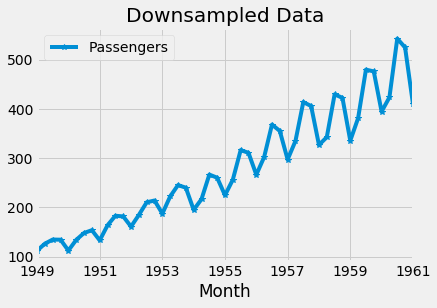

In [19]:
passengers_quaterly = passengers.resample('3M').mean()
passengers_quaterly.plot(marker='*')
plt.title('Downsampled Data')
plt.show()

### Upsample to daily data points

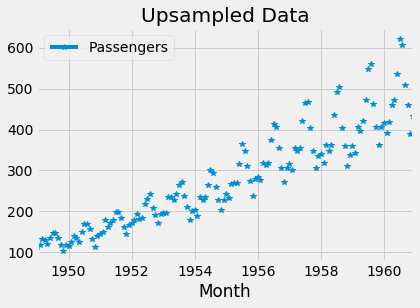

In [20]:
passengers_daily = passengers.resample('D').mean()
passengers_daily.plot(marker='*')
plt.title('Upsampled Data')
plt.show()

## Smoothing Time Series Data

Smoothing is often applied to time series data to help identify patterns better and generally make data more understandable. Irregular roughness is often smoothened out to see clearer signals at lower frequencies by removing higher frequency behaviour. Smoothing can also be described as a preprocessing technique that removes noise from a dataset. There are several time series smoothing techniques, some of which include moving average, exponential smoothing, and Holt’s method.

**Moving average smoothing:**  this is an effective and naive technique that involves determining the weighted averages of observed values, or previous observations surrounding a certain time. A sliding window with a specified window size, known as the window width, is slid across the series to calculate the average values.  It can either be centered where observations before and after time t are used or trailing where observations before or at time t  are used.

In [21]:
passengers_MA = passengers.copy()
MA =passengers_MA.Passengers.rolling(12).mean()
MA

Month
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
                 ...    
1960-08-01    463.333333
1960-09-01    467.083333
1960-10-01    471.583333
1960-11-01    473.916667
1960-12-01    476.166667
Name: Passengers, Length: 144, dtype: float64

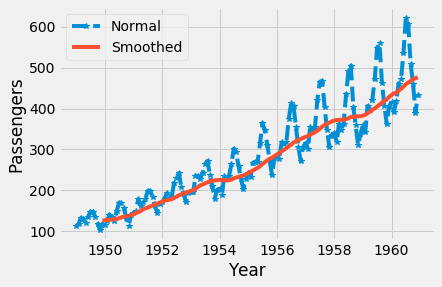

In [22]:
plt.plot(passengers_MA.index, passengers_MA.Passengers, '--', marker='*')
plt.plot(passengers_MA.index, MA)
plt.legend(['Normal', 'Smoothed'])
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.show()

**Exponential smoothing:**  this technique handles various time points differently during smoothing, because more recent data might be more informative. It assigns an exponentially decreasing weights as the observations get older. It can be described as a weighted moving average. There are three major types of exponential smoothing methods, namely: single, double, and triple exponential smoothing. Single exponential smoothing is used for univariate time series data that have no trend or seasonality. The smoothing coefficient (alpha), usually between 0 and 1 is the single parameter required to control the decay and influence of previous observations. On the other hand, double exponential smoothing can be used for univariate time series that have a trend. It includes an additional parameter (beta) that controls the decay of the influence of trend. Finally, the triple exponential smoothing is an extension that can handle univariate time series, that have both trend and seasonality with the inclusion of gamma - a third parameter that controls the influence of seasonality.

## Time Series Specific Exploratory Methods

Exploratory data analysis helps identify patterns and structure in a dataset. It provides an initial understanding of the data and guide towards the first modelling steps. In time series, it is important to identify any seasonality, trend, or stationarity in the series so that the appropriate model can be used to forecast future values.

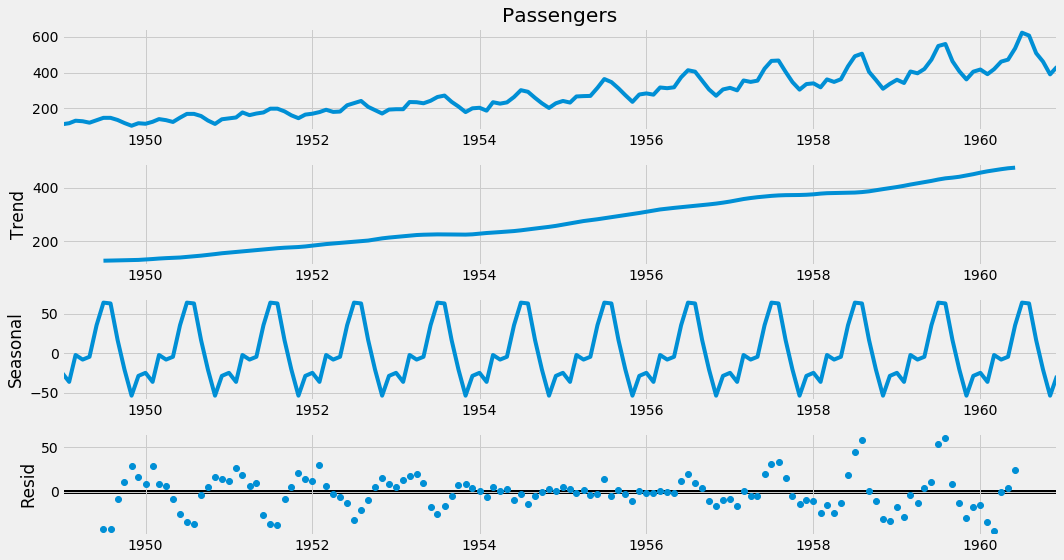

In [23]:
rcParams['figure.figsize'] = 15, 8
decompose_series = sm.tsa.seasonal_decompose(passengers.Passengers, model='additive')
decompose_series.plot()
plt.show()

The decomposed time series show an obvious increasing trend and seasonality variations. Recall that we have initially plotted the moving average on the last 12 months which showed that it varies with time. This suggests that the data is not stationary. We will now perform an ADF test to confirm this speculation.

In [24]:
adf_result = adfuller(passengers.Passengers)
print(f"""ADF Statistic: {adf_result[0]}
p-value: {adf_result[1]}
No. of lags used: {adf_result[2]}
No. of observations used: {adf_result[3]}
Critical Values:""")
for k, v in adf_result[4].items():
    print(f'\t{k}: {v}')

ADF Statistic: 0.8153688792060456
p-value: 0.991880243437641
No. of lags used: 13
No. of observations used: 130
Critical Values:
	1%: -3.4816817173418295
	5%: -2.8840418343195267
	10%: -2.578770059171598


From the results obtained, the p-value is greater than the critical value at a 5% #significance level and, the ADF statistic is greater that any of the critical values obtain. This confirms that the series is indeed non-stationary. We will Convert time series to stationary by removing trend and seasonality

### Transformation and Differencing

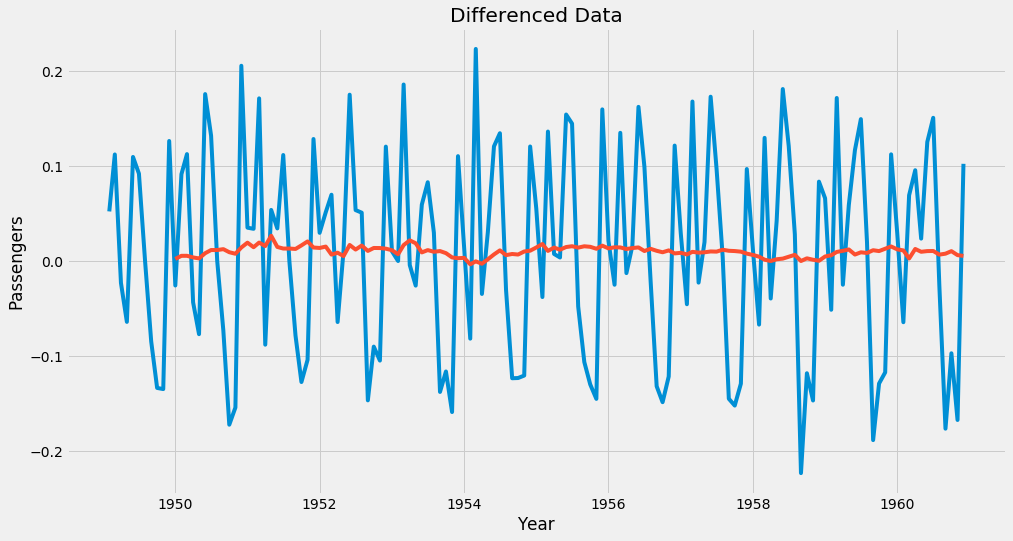

In [25]:
passengers_log = np.log(passengers)
passengers_diff = passengers_log.diff(periods=1)
plt.plot(passengers_diff.index, passengers_diff.Passengers, '-')
plt.plot(passengers_diff.rolling(12).mean())
plt.title('Differenced Data')
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.show()

# Forecasting Performance Measures

We will explore the different ways of evaluating time series models.

## Various Forecast Performance Measures

It is essential to correctly evaluate our models with the appropriate metrics. In time series forecasting, there are a number of measures that can be used to evaluate how well a model performs. We will discuss some of these below.

**Mean Absolute Error (MAE):**  This is a measure of the forecast error obtained by taking the average of the absolute errors of the forecasted values, where the error is the difference between the forecasted value and the true value. Simply put, it tells the average of the error that should be expected from a forecast. The MAE is robust to outliers and scale-dependent error so it cannot be used to compare different series.

$$
\mbox{If }y_i\mbox{ and }\hat{y}_i\mbox{ represents the actual value and the forecasted value respectively, then }\\
MAE = \frac{1}{n}\sum_{i=1}^n|y_i\hat{y}_i|
$$

**Mean Absolute Percentage Error (MAPE)** : It is a well known measure used to determine the accuracy of a forecasting method. The accuracy is calculated as a percentage, such that the average of the difference between the actual value and the forecast value is divided by the actual value. The average of the sum of the absolute value of this calculation for every data point forecasted is multiplied by 100 to obtain a percentage error. MAPE can be easily interpreted and scale independent; and should not be used with low-volume data. In addition, it should not be used when the values are zero or close to zero, because it results in undefined and indefinite values.
$$
MAPE = (\frac{1}{n}\sum_{i=1}^n|\frac{y_i-\hat{y}_i}{y_i}|)*100
$$

**Root Mean Square Error (RMSE)** : The RMSE calculates square root of the average of the squared errors  (i.e. the square of the difference between the actual and forecasted value).  This measure tends to exaggerate large errors by giving a relatively high weight to large errors, because it takes the square root of the average squared errors. The Mean Squared Error (MSE) is simply the average of the square of the errors.
$$
RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^n(y_i - \hat{y}_i)^2}
$$

# Time Series Forecasting Using Stochastic Models

We will be exploring the several models that can be used to forecast time series.

All codes can be found [here](https://gist.github.com/HamoyeHQ/511c9fa86d4d6db84b977a1e02f99c38).

There are several models that can be used to forecast time series, some which we will discuss in this section. 

1. Autoregressive Moving Average (ARMA) Models

2. Autoregressive Integrated Moving Average (ARIMA) Models

3. Seasonal Autoregressive Integrated Moving Average (SARIMA) Models

**Autoregressive Model (AR)** : This is a linear combination of previous values of the variable being forecasted. It can be likened to a linear regression of the observations in the current series, against the past values from that same series. It is referred to as autoregressive, because it is a regression of the variable against itself. The number of past time steps to be inputted is determined by a single argument, p.

Moving Average Model (MA): MA models consider past residuals. Instead of using past values as in AR models, MA models use previous forecast errors to model the next step in the sequence. The order of the model is specified with the q parameter as in MA(q). While this might be mixed up with the moving average described above, the MA model is used to forecast future values while the smoothing technique allows for estimating trend cycles of previous observations. 

**Autoregressive Moving Average (ARMA):**  As the name suggests, ARMA(p, q) is a combination of the AR and MA models. It models the future values in the series as a linear combination of the observations and the errors of previous time steps.

**Autoregressive Integrated Moving Average (ARIMA):**  Although very similar to ARMA, ARIMA includes a differencing phase called integration, where the series is made stationary.  ARIMA(p,d,q) includes a third parameter d which represents the number of non-seasonal differences required to make the data stationary. A non-seasonal time series that is not a random white noise and shows patterns can be modeled with an ARIMA model.

**Seasonal Autoregressive Integrated Moving Average (SARIMA)** : This is an extension of the ARIMA model performed at the seasonal level. It is represented as ARIMA(p,d,q)(P, D, Q)m, where the new variables (P, D, Q) represent p,d,q for the seasonal part of the series; m represents the number of periods in each session. SARIMA factors in seasons by differencing the current value ,and its value in the previous season.

## Stationarity Analysis, Autocorrelation, and Partial Autocorrelation Functions (ACF & PACF)

Having discussed the importance of a stationary time series in forecasting, we now identify methods that can be used to test for stationarity. Visualisations, statistical tests and summary statistics are commonly used to check that a series is stationary. 

**Visualisations** : As done when exploring data for data analysis tasks, visualising datasets tend to give a quick view to patterns present. Though it is not dependable; but it is possible to visually determine if there is a known stationarity property present by plotting time series data. Plots can show an obvious lack of trend and seasonality in the series.

**Statistical tests:**  These can be used to check if the expectations of a stationary time series are met. An example is the unit root test used to check for the presence of a trend in a series if it has a unit root. For the test, the null hypothesis $H_0$, proposes that the series is non-stationary (time-dependent) because it has a unit root. If the null hypothesis is rejected, the alternate hypothesis H1 proposes that the series is independent of time and does not have a unit root, hence, it is stationary. As in statistical tests, a threshold is set for the p-value to reject the hypothesis. If a threshold is set at 5%, then a p-value > 0.05 will fail to reject the null hypothesis, suggesting that the time series is non-stationary. However, with a p-value <= 0.05, we can reject the null hypothesis and conclude that the series has no unit, hence, it is stationary. The Augmented Dickey-Fuller (ADF) test is a well known unit root statistical test that allows for higher order autoregressive processes. It is an extension of the Dickey-Fuller (DF) test used for more complex and larger time series models. In python, the adfuller() function used for the test can be found in the statsmodel package. Another unit root test is the KPSS test. With this test, the null and alternate hypothesis are opposites of the ADF test. Summarily, for the KPSS test, the null hypothesis H0 suggests that the series is stationary while the alternate hypothesis suggests that the series is non-stationary.

**Summary statistics** : By splitting the series into different groups and comparing the mean and variance across them, there is a high chance that the series is non-stationary if there is a significant difference among the groups.

**Autocorrelation Function (ACF):**  Autocorrelation refers to the correlation between the past values in a time series. It measures the linear relationship between lagged values in the series. The ACF plot or correlogram is used to display the autocorrelation in a time series by lag. The correlation coefficient between -1 and 1 is displayed on the y-axis, and the lags are displayed on the x-axis.

**Partial Autocorrelation Function (PACF):**  PACF gives the partial correlation of a stationary series with its lagged values not accounted for by prior lagged observations. This gives an overview of the relationship between an observation in a series, and observations in previous time steps while removing interfering observations. The PACF at a specific lag, is the correlation that occurs after removing the effect of any correlations as a result of shorter lags. In contrast to ACF, it controls for other lags.

The ACF and PACF plots are displayed as bar charts showing confidence intervals at 95% and 99% as horizontal lines across the bars. Any bar that crosses these intervals is deemed to be more significant and noteworthy.

### ACF

In [26]:
passengers_diff = passengers_diff.fillna(method='bfill')

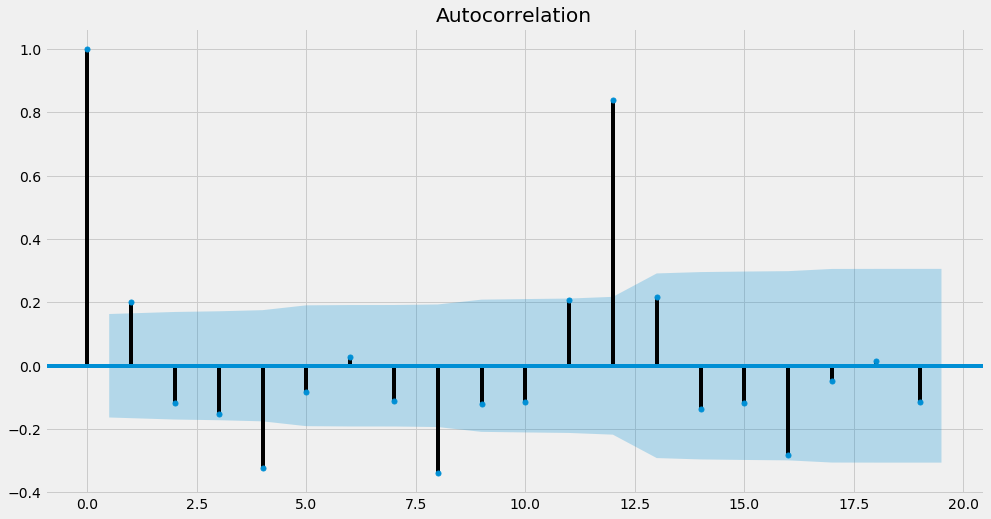

In [27]:
plot_acf(passengers_diff, lags=range(0, 20))
plt.show()

### PACF

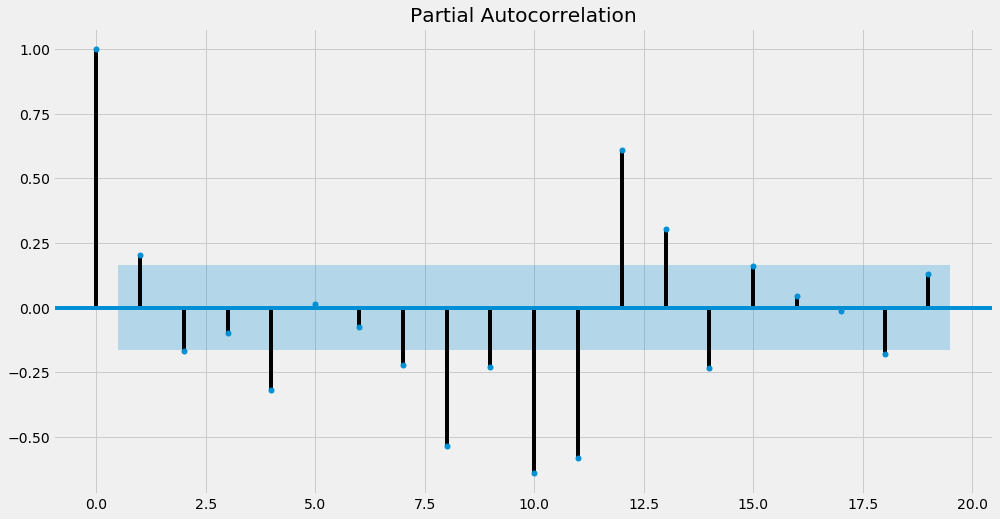

In [28]:
plot_pacf(passengers_diff.dropna(), lags=range(20))
plt.show()

The shaded regions in the plots are the confidence intervals. The lags where the PACF and ACF charts cross this region are the values for p and q respectively. 

In the ACF plot, there is one lag that crosses the significance level hence, q=1. Similarly #in the PACF plot, p=2

### AR, MA and ARIMA

#### (p,d,q)

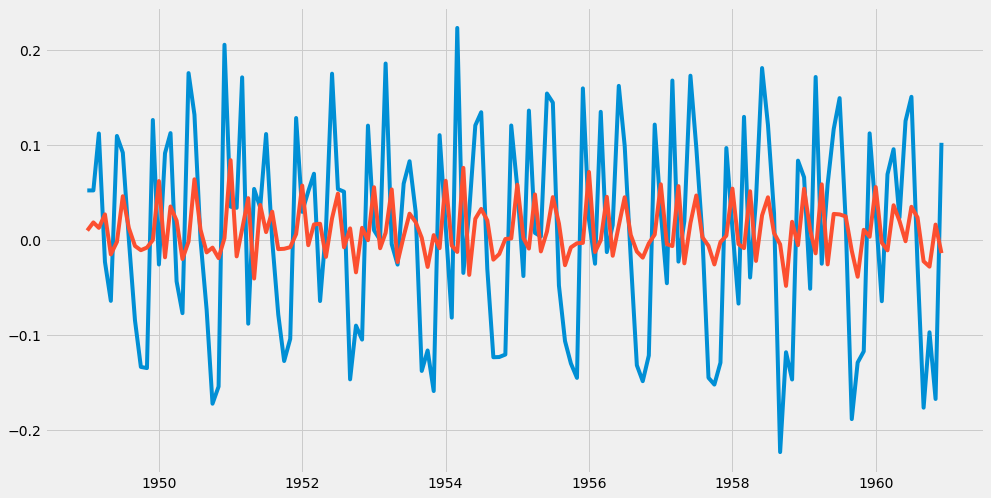

In [29]:
AR_model = ARIMA(passengers_diff, order=(2, 0, 0))
AR_model_results = AR_model.fit()
plt.plot(passengers_diff)
plt.plot(AR_model_results.fittedvalues)
plt.show()

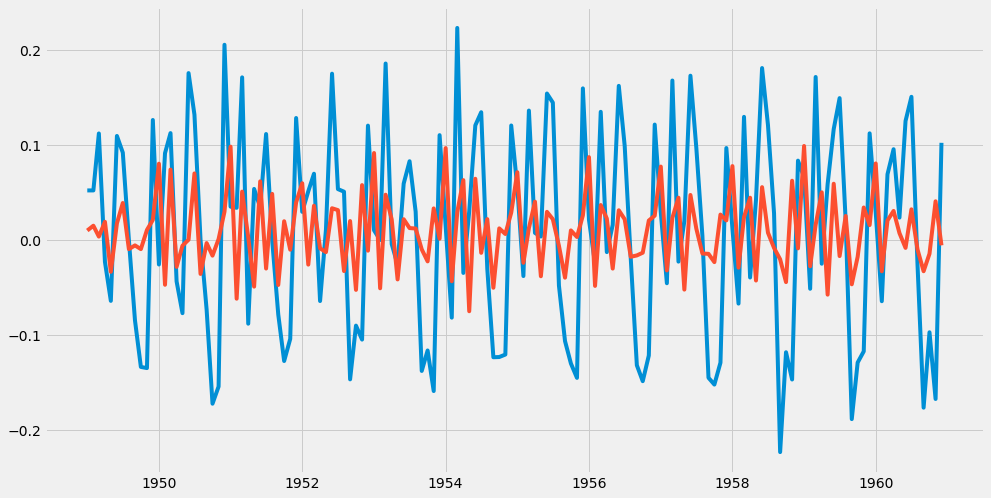

In [30]:
MA_model = ARIMA(passengers_diff, order=(0, 0, 2))
MA_model_results = MA_model.fit()
plt.plot(passengers_diff)
plt.plot(MA_model_results.fittedvalues)
plt.show()

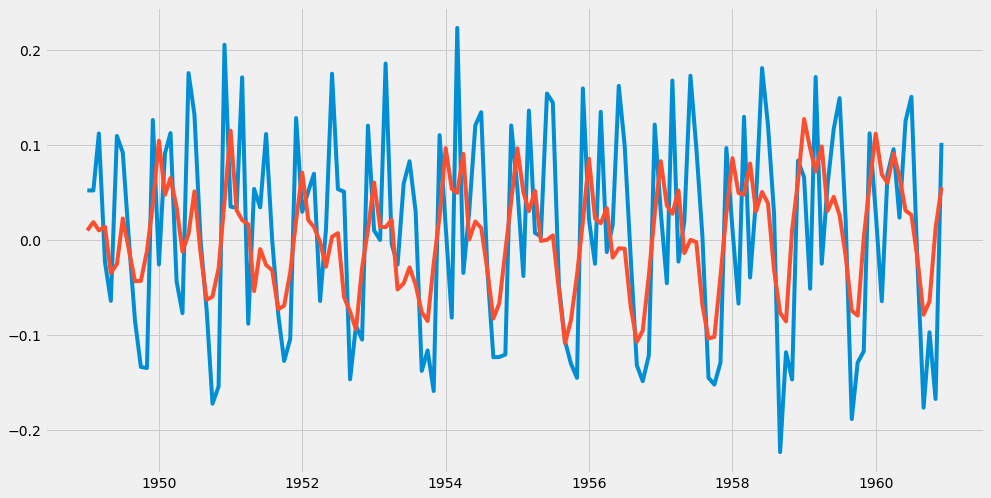

In [31]:
ARIMA_model = ARIMA(passengers_diff, order=(2, 0, 1))
ARIMA_model_results = ARIMA_model.fit()
plt.plot(passengers_diff)
plt.plot(ARIMA_model_results.fittedvalues)
plt.show()

## Box-Jenkins Methodology

This is a method  by George Box and Gwilym Jenkins that suggests that the process from which a time series was generated, can be modelled with ARMA if stationary, and ARIMA if non-stationary. It is an iterative approach that involves a three stage modelling approach which includes identification, estimation, and diagnostic checking.

**Identification:**  The initial step involves identifying if the series is stationary; the number of differences required to make it stationary if it is non-stationary; and to identify the order of the autoregressive and moving average terms - p and q respectively. They recommend a differencing approach to achieve stationarity. Unit roots statistical tests can be used to test for stationarity after each differencing round. It is important to prevent over differencing to avoid the inclusion of more complexity and extra serial correlation.  ACF and PACF plots are used to obtain q and p such that if there is a strong cut-off in the PACF after a lag, and the ACF trails off after a lag, the model is AR. If the autocorrelations are cut off after a few lags, then the last lag with a large value will be the estimated value of q. However, an autoregressive model or an ARIMA model with positive values for p and q are obtained if the autocorrelations do not cut off. For a MA model, there is a strong cut-off in the ACF after the lag and the PACF trails off after a lag. The PACF determines p such that if the partial autocorrelations are cut off after a few lags, p will be the last lag with a large value. Similarly, if the partial autocorrelations do not cut off, a moving average model is obtained, or an ARIMA model with positive p and q values

**Estimation** : Numerical methods that involve maximum likelihood estimation is used to minimize the error term. This can be a calculation intensive and complicated process; the reason why the parameter estimation is left to be solved by software.

**Diagnostic checking:**  The model is checked properly to ensure that it is not overfitting and capturing random noise. An ideal model should have errors that resemble white noise. In addition, the residuals of the model are inspected to confirm that there is no additional structure. Finally, a suitable model is selected.

# Time Series at Scale

Exploring how to deploy time series model at scale.

All codes can be found [here](https://gist.github.com/HamoyeHQ/1db2a7d90f7ca949986c286917c584f3).

Prophet is an open-source library for univariate time series forecasting developed by Facebook. It implements decomposable additive models that support trends, seasonality and holidays. The components of the model can be combined such that
$$
y(t) = g(t) + s(t) + h(t) + \epsilon{t}
$$
Where $y(t)$ is the forecast. $g(t)$ is the piecewise linear or logistic growth curve that models non-predictive changes in time series. $s(t)$ represents seasonality in the series for periodic changes. $h(t)$ allows for irregularities by factoring in the effects of specified holidays. $\epsilon{t}$ is the error term for unsual changes.

Prophet helps automate the calculation of terms within the model and prevents forecast errors. This library forecasts data by using either of two models: the logistic growth model for non-linear data, or the piecewise linear model for data with linear properties, but selects the latter by default. The library provides easy to tune and intuitive parameters that can be used without necessarily being a forecasting expert.

In [35]:
passengers = passengers.reset_index()
passengers = passengers.rename(
    columns={
        "Month": "ds", 
        "Passengers": "y"
    }
)
passengers.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [36]:
model = Prophet()
model.fit(passengers)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\user\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



## predict for the next 10 months

In [38]:
future = model.make_future_dataframe(periods=10, freq='M')
forecast = model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,107.305438,57.639747,114.804941,107.305438,107.305438,-21.441736,-21.441736,-21.441736,-21.441736,-21.441736,-21.441736,0.0,0.0,0.0,85.863702
1,1949-02-01,109.453605,50.011368,109.482026,109.453605,109.453605,-30.116981,-30.116981,-30.116981,-30.116981,-30.116981,-30.116981,0.0,0.0,0.0,79.336624
2,1949-03-01,111.393884,81.581395,139.564663,111.393884,111.393884,-0.479840,-0.479840,-0.479840,-0.479840,-0.479840,-0.479840,0.0,0.0,0.0,110.914044
3,1949-04-01,113.542050,78.376124,139.126571,113.542050,113.542050,-4.944334,-4.944334,-4.944334,-4.944334,-4.944334,-4.944334,0.0,0.0,0.0,108.597716
4,1949-05-01,115.620921,83.985082,140.104715,115.620921,115.620921,-3.631653,-3.631653,-3.631653,-3.631653,-3.631653,-3.631653,0.0,0.0,0.0,111.989268


In [39]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,1949-01-01,85.863702,57.639747,114.804941,107.305438,107.305438,107.305438
1,1949-02-01,79.336624,50.011368,109.482026,109.453605,109.453605,109.453605
2,1949-03-01,110.914044,81.581395,139.564663,111.393884,111.393884,111.393884
3,1949-04-01,108.597716,78.376124,139.126571,113.542050,113.542050,113.542050
4,1949-05-01,111.989268,83.985082,140.104715,115.620921,115.620921,115.620921
...,...,...,...,...,...,...,...
149,1961-05-31,533.678072,503.388275,563.018515,502.767098,502.615091,502.944515
150,1961-06-30,577.363146,550.577430,605.223703,505.790984,505.577830,506.027438
151,1961-07-31,575.886049,546.196011,605.506355,508.915667,508.646397,509.218512
152,1961-08-31,529.974471,499.779299,559.477680,512.040349,511.705120,512.407994


yhat is the prediction while yhat_lower and yhat_upper are the upper and lower boundaries

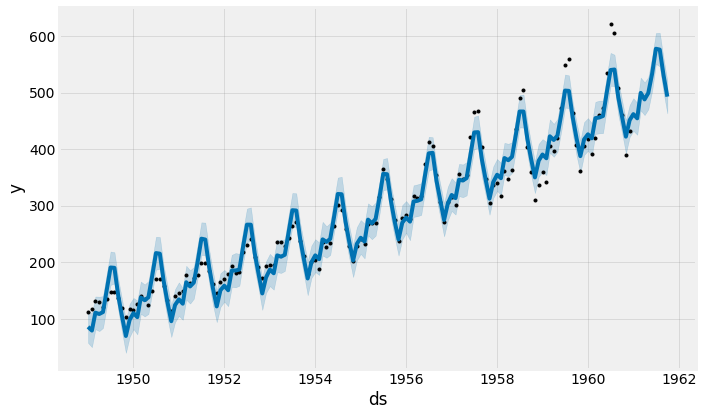

In [40]:
model.plot(forecast)
plt.show()

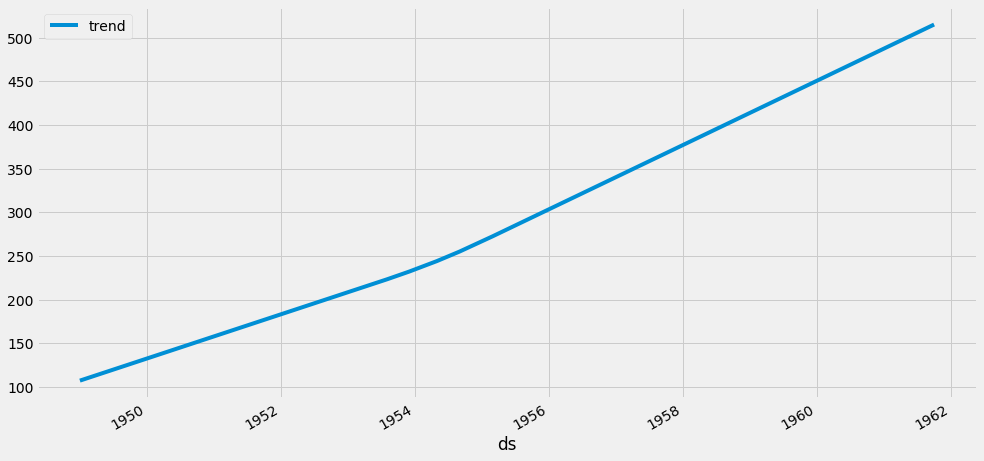

In [41]:
forecast.plot('ds', 'trend')
plt.show()

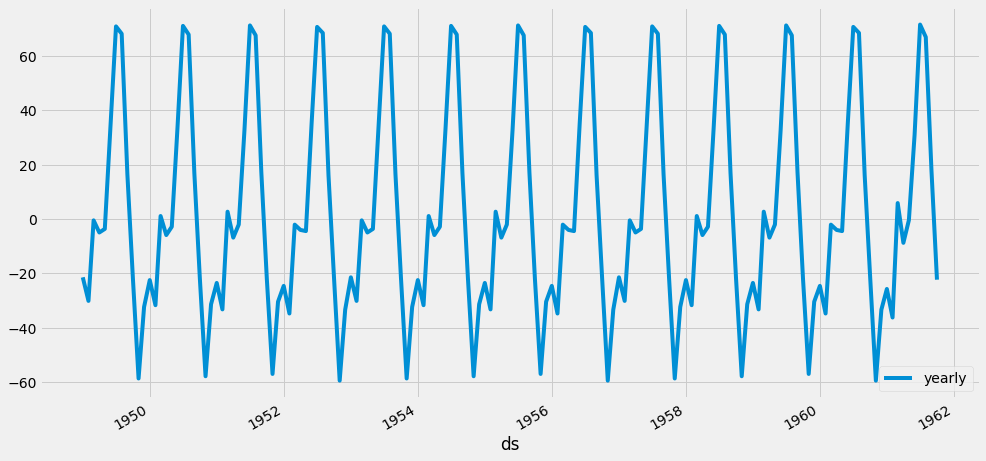

In [42]:
forecast.plot('ds', 'yearly')
plt.show()

## Time series using Neural Networks

As opposed to the classical forecasting methods that assume that there is a linear relationship between the inputs and outputs, neural networks can approximate nonlinear functions without having prior information about the properties of the series. Neural networks can support multiple inputs and outputs; and learn complex mappings between them. Multilayer perceptron (MLPs) are robust to noise and missing values; Convolutional Neural Networks (CNNs)  have the ability to automatically extract features from raw data, which can be done to time series; Recurrent Neural Networks (RNNs), and Long Short-Term Memory Networks (LSTMs) support for sequences in input data as in time series. 